In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('Online_Retail_2.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
111304,545717,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1.0,07/03/2011 10:15,4.13,NaN,United Kingdom
111305,545717,35004B,SET OF 3 BLACK FLYING DUCKS,1.0,07/03/2011 10:15,12.46,NaN,United Kingdom
111306,545717,48185,DOORMAT FAIRY CAKE,1.0,07/03/2011 10:15,14.13,NaN,United Kingdom
111307,545717,48194,DOORMAT HEARTS,1.0,07/03/2011 10:15,14.13,NaN,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111309 entries, 0 to 111308
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      111309 non-null  object 
 1   StockCode    111309 non-null  object 
 2   Description  110984 non-null  object 
 3   Quantity     111308 non-null  float64
 4   InvoiceDate  111308 non-null  object 
 5   Price        111308 non-null  float64
 6   Customer ID  73930 non-null   float64
 7   Country      111308 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.8+ MB


In [7]:
df.isnull()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
111304,False,False,False,False,False,False,True,False
111305,False,False,False,False,False,False,True,False
111306,False,False,False,False,False,False,True,False
111307,False,False,False,False,False,False,True,False


In [8]:
df = df.dropna(subset=['Customer ID'])


In [10]:
df['TotalAmount'] = df['Quantity'] * df['Price']
df

<ipython-input-10-289380c4cbdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
111050,545710,22258,FELT FARM ANIMAL RABBIT,12.0,07/03/2011 09:52,1.25,13117.0,United Kingdom,15.00
111051,545710,22264,FELT FARM ANIMAL WHITE BUNNY,12.0,07/03/2011 09:52,0.85,13117.0,United Kingdom,10.20
111052,545710,85213,MINI ZINC GARDEN DECORATIONS,12.0,07/03/2011 09:52,0.85,13117.0,United Kingdom,10.20
111053,545710,18097C,WHITE TALL PORCELAIN T-LIGHT HOLDER,6.0,07/03/2011 09:52,2.55,13117.0,United Kingdom,15.30


In [11]:
total_purchase = df.groupby('Customer ID')['TotalAmount'].sum().reset_index()

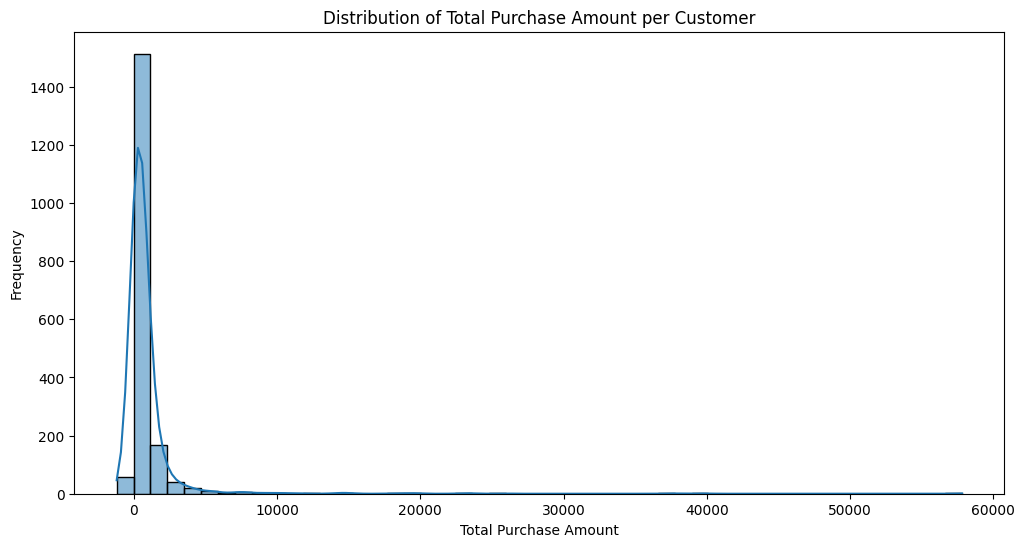

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(total_purchase['TotalAmount'], bins=50, kde=True)
plt.title('Distribution of Total Purchase Amount per Customer')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [13]:
customer_summary = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',     # Number of unique invoices (transactions)
    'Quantity': 'sum',        # Total quantity purchased
    'TotalAmount': 'sum'      # Total purchase amount
}).reset_index()

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary.drop('Customer ID', axis=1))

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

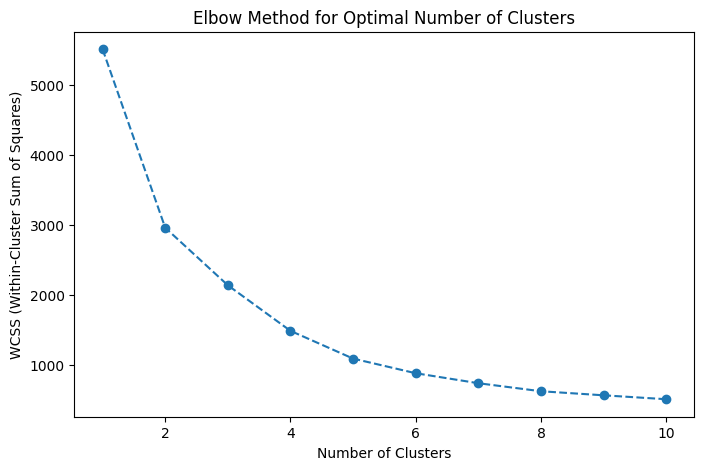

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
customer_summary['PCA1'] = pca_result[:, 0]
customer_summary['PCA2'] = pca_result[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


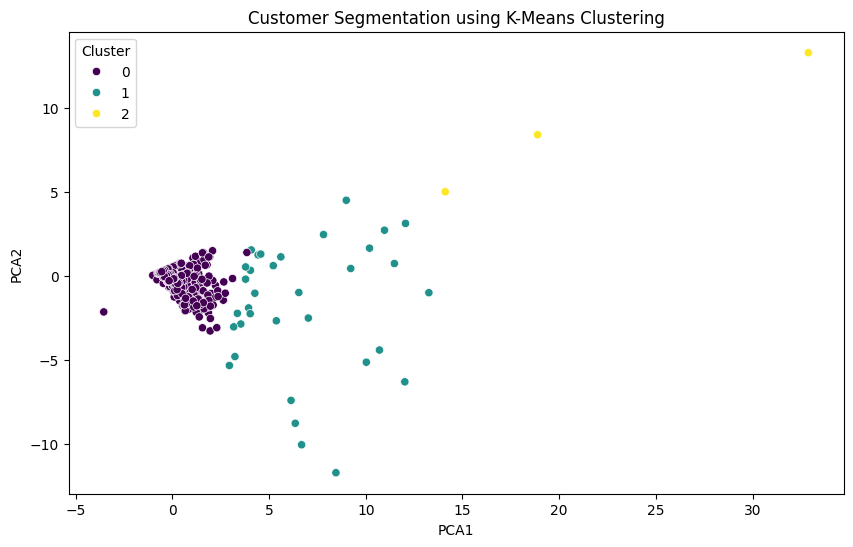

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_summary, palette='viridis', legend='full')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [20]:
cluster_analysis = customer_summary.groupby('Cluster').mean().reset_index()
cluster_analysis

,Cluster,Customer ID,Invoice,Quantity,TotalAmount,PCA1,PCA2
0,0,15304.282621,2.133259,334.908384,602.281388,-0.162783,0.019967
1,1,14955.323529,16.500000,6086.264706,10254.705000,6.685229,-1.842622
2,2,15054.333333,7.666667,25304.000000,45087.050000,21.957846,8.896052
